### DCS 630
# Week 09
## Project Milestone 1 + Milestone 2 + Milestone 3 + Milestone 4

 

### Name: Aniruddha Joshi
### Date: May 11, 2024

In [47]:
#Defining Libraries required for import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import sklearn as sk
import textblob as tb
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer
import operator
import unicodedata
import sys
import re
import os
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import geopandas as gpd
from geopy.geocoders import Nominatim
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import mean_squared_error, r2_score, classification_report
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import warnings
import plotly.express as px
import plotly.io as pio

In [18]:
DATASET_DIRECTORY = 'C:\\Users\\joshi\\OneDrive\\MS Data Sceinece\\DCS 630\\Week 6\\CICIoT2023\\'

### Import Datasets

In [19]:
df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
df_sets.sort()
training_sets = df_sets[:int(len(df_sets)*.8)]
test_sets = df_sets[int(len(df_sets)*.8):]

In [20]:
#select column names - the X ans the output
X_columns = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration',
       'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count',
       'syn_count', 'fin_count', 'urg_count', 'rst_count', 
    'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP',
       'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
       'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue',
       'Radius', 'Covariance', 'Variance', 'Weight', 
]
y_column = 'label'

### Scaling

In [21]:
#Load the dataset as a Pandas data frame.
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()

In [22]:
for train_set in tqdm(training_sets):
    scaler.fit(pd.read_csv(DATASET_DIRECTORY + train_set)[X_columns])

100%|██████████| 8/8 [00:03<00:00,  2.10it/s]


### Classification: 34 (33+1) classes

In [23]:
ML_models = [
        LogisticRegression(n_jobs=-1),
]

ML_neams = [
        "LogisticRegression",
]

for train_set in tqdm(training_sets):
    d = pd.read_csv(DATASET_DIRECTORY + train_set)
    d[X_columns] = scaler.transform(d[X_columns])
    for model in (ML_models):
        model.fit(d[X_columns], d[y_column])
    

100%|██████████| 8/8 [01:44<00:00, 13.05s/it]


In [24]:
# Check for missing values
missing_values = d.isnull().sum()

# Check for duplicate rows
duplicates = d.duplicated().sum()

missing_values, duplicates

(flow_duration      0
 Header_Length      0
 Protocol Type      0
 Duration           0
 Rate               0
 Srate              0
 Drate              0
 fin_flag_number    0
 syn_flag_number    0
 rst_flag_number    0
 psh_flag_number    0
 ack_flag_number    0
 ece_flag_number    0
 cwr_flag_number    0
 ack_count          0
 syn_count          0
 fin_count          0
 urg_count          0
 rst_count          0
 HTTP               0
 HTTPS              0
 DNS                0
 Telnet             0
 SMTP               0
 SSH                0
 IRC                0
 TCP                0
 UDP                0
 DHCP               0
 ARP                0
 ICMP               0
 IPv                0
 LLC                0
 Tot sum            0
 Min                0
 Max                0
 AVG                0
 Std                0
 Tot size           0
 IAT                0
 Number             0
 Magnitue           0
 Radius             0
 Covariance         0
 Variance           0
 Weight   

In [25]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227910 entries, 0 to 227909
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    227910 non-null  float64
 1   Header_Length    227910 non-null  float64
 2   Protocol Type    227910 non-null  float64
 3   Duration         227910 non-null  float64
 4   Rate             227910 non-null  float64
 5   Srate            227910 non-null  float64
 6   Drate            227910 non-null  float64
 7   fin_flag_number  227910 non-null  float64
 8   syn_flag_number  227910 non-null  float64
 9   rst_flag_number  227910 non-null  float64
 10  psh_flag_number  227910 non-null  float64
 11  ack_flag_number  227910 non-null  float64
 12  ece_flag_number  227910 non-null  float64
 13  cwr_flag_number  227910 non-null  float64
 14  ack_count        227910 non-null  float64
 15  syn_count        227910 non-null  float64
 16  fin_count        227910 non-null  floa

In [26]:
y_test = []
preds = {i:[] for i in range(len(ML_models))}
for test_set in tqdm(test_sets):
    d_test = pd.read_csv(DATASET_DIRECTORY + test_set)
    d_test[X_columns] = scaler.transform(d_test[X_columns])
    
    y_test += list(d_test[y_column].values)
    
    for i in range(len(ML_models)):
        model = ML_models[i]
        y_pred = list(model.predict(d_test[X_columns]))
        preds[i] = preds[i] + y_pred

100%|██████████| 2/2 [00:01<00:00,  1.93it/s]


In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
for k,v in preds.items():
    y_pred = v
    print(f"##### {ML_neams[k]} (34 classes) #####")
    print('accuracy_score: ', accuracy_score(y_pred, y_test))
    print('recall_score: ', recall_score(y_pred, y_test, average='macro'))
    print('precision_score: ', precision_score(y_pred, y_test, average='macro'))
    print('f1_score: ', f1_score(y_pred, y_test, average='macro'))
    print()
    print()
    print()

##### LogisticRegression (34 classes) #####
accuracy_score:  0.8016702430461047


c:\Users\joshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_score:  0.5855280514283756
precision_score:  0.48308193451950115
f1_score:  0.48969760075270646





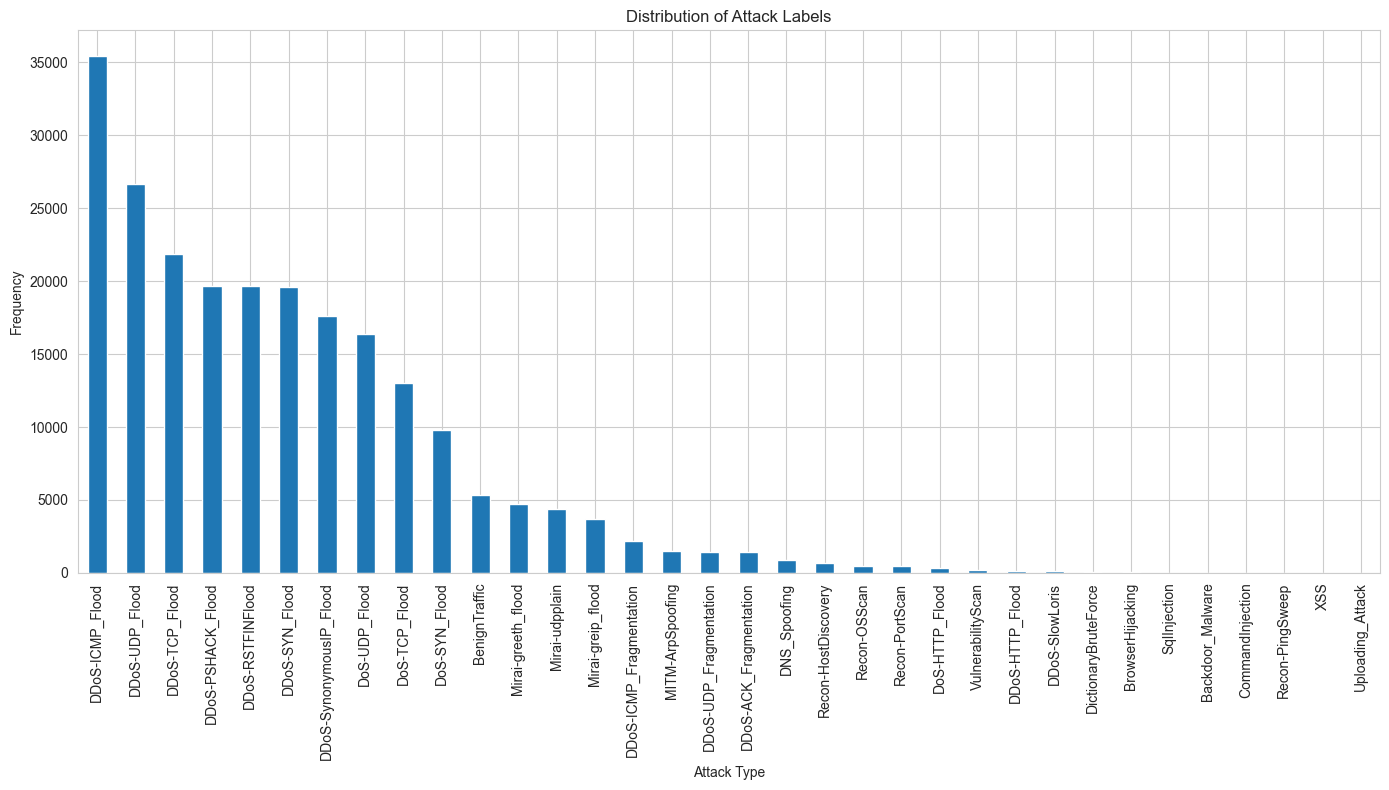

In [28]:
# Distribution of attack labels

attack_label_counts = d['label'].value_counts()
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Bar chart for the distribution of attack labels
plt.figure(figsize=(14, 8))
attack_label_counts.plot(kind='bar')
plt.title('Distribution of Attack Labels')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate the x labels to show them clearly
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping

# Show the plot
plt.show()

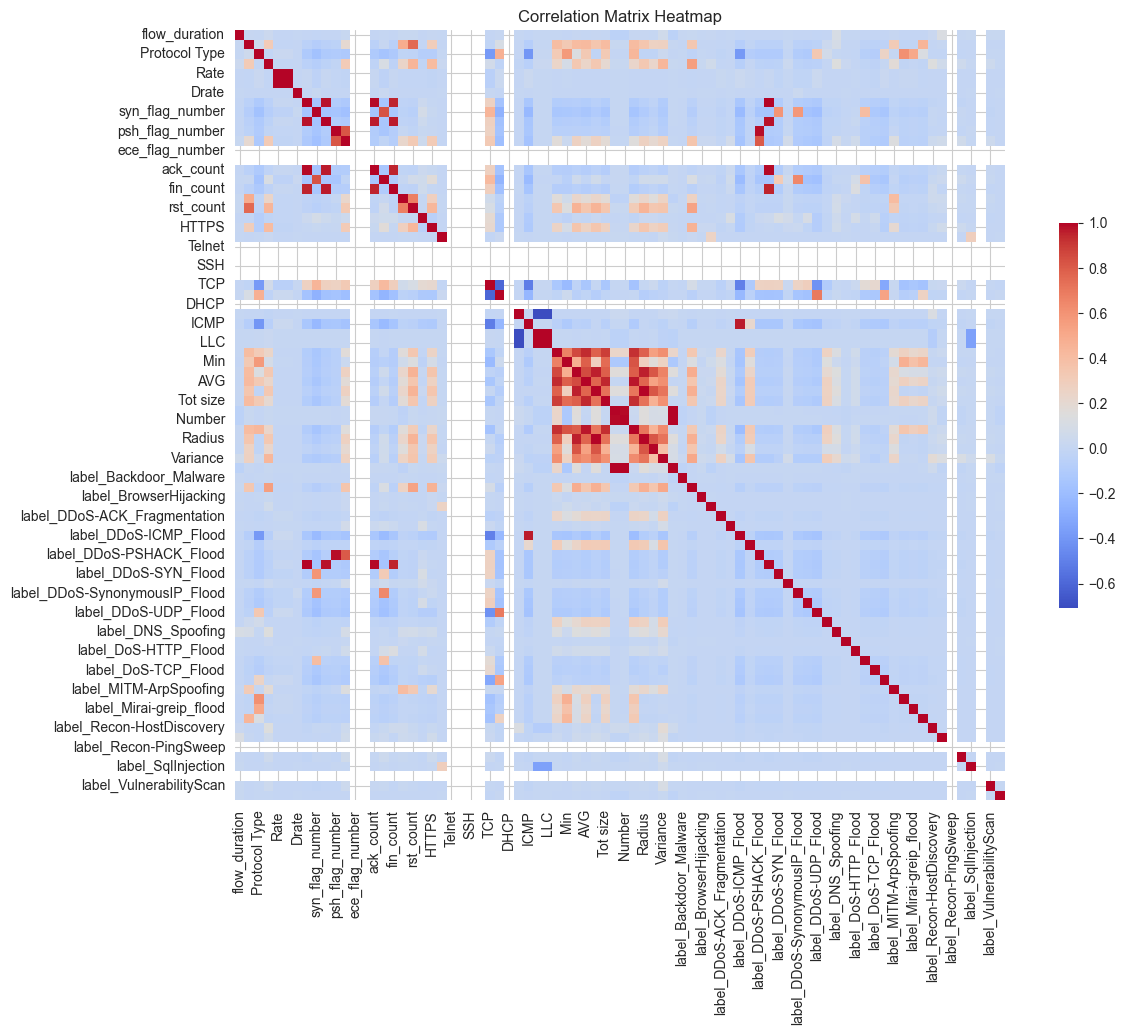

In [40]:
# Identify categorical variables
categorical_columns = d.select_dtypes(include=['object']).columns

# Apply one hot encoding to the categorical columns
df_encoded = pd.get_dummies(d, columns=categorical_columns)

# Sample a fraction of the data to avoid memory issues
df_sampled = df_encoded.sample(frac=0.1, random_state=1)

# Calculate the correlation matrix
corr_subset = df_sampled.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_subset, annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap')
plt.show()

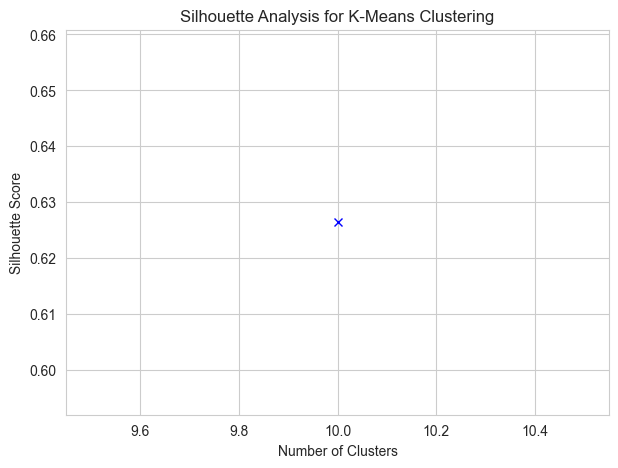

In [45]:
d_test = d.drop(['label'], axis=1)
X = d_test
range_n_clusters = [10]
silhouette_avgs = []

# K-means clustering with different number of clusters
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

# Plot silhouette scores vs number of clusters
plt.figure(figsize=(7,5))
plt.plot(range_n_clusters, silhouette_avgs, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.show()

In [46]:
X = d_test
silhouette_avgs = []

# K-means clustering with different number of clusters

clusterer = KMeans(n_clusters=34, random_state=10, n_init=10)
cluster_labels = clusterer.fit_predict(X)

# The silhouette_score gives the average value for all the samples.
silhouette_avg = silhouette_score(X, cluster_labels)
#silhouette_avgs.append(silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

In [48]:
# Create a PCA object with n_components set to 2
pca = PCA(n_components=2)

# Fit the PCA model to the scaled data
pca.fit(d_test)

# Now you can use pca.transform(data) to transform new data
# OR
# Use pca.components_ to get the principal components
transformed_data = pca.transform(d_test)
principal_components = pca.components_

print("Shape of the transformed data:", transformed_data.shape)
print("Shape of the principal components:", principal_components.shape)

Shape of the transformed data: (227910, 2)
Shape of the principal components: (2, 46)


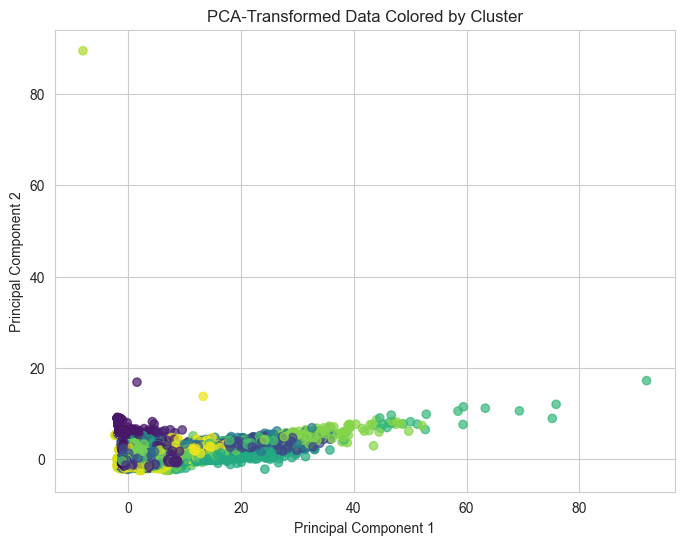

In [49]:
# Create the scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)

# Label the axes based on the original feature names (optional)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.title('PCA-Transformed Data Colored by Cluster')
plt.show()

In [50]:
X = d_test
silhouette_avgs = []

# K-means clustering with different number of clusters

clusterer = KMeans(n_clusters=2, random_state=10, n_init=10)
cluster_labels = clusterer.fit_predict(X)

# The silhouette_score gives the average value for all the samples.
silhouette_avg = silhouette_score(X, cluster_labels)
#silhouette_avgs.append(silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

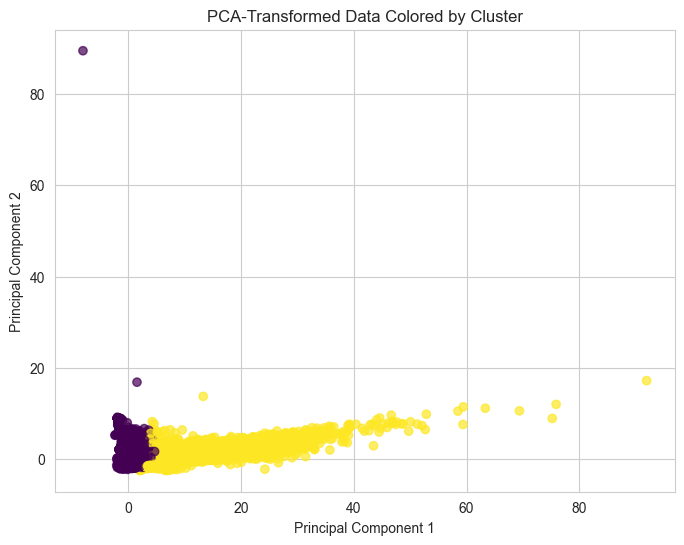

In [51]:
# Create the scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)

# Label the axes based on the original feature names (optional)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.title('PCA-Transformed Data Colored by Cluster')
plt.show()